# Video: Building a Simple Chess Bot

Chess was a testbed for artificial intelligence research for a few decades.
This video will show you how to build a very simple chess bot.

Script:
* When the term artifical intelligence was first coined, chess was considered a serious test of artificial intelligence.
* We have since realized that chess is relatively easy for computers even though it is hard for humans, but it is still fun to play around with to learn the basic techniques.
* I am going to walk you through a very simple implementation of a chess bot.
* This implementation would not have been state of the art any time after 1980, but you'll see the basic ideas.

In [ ]:
!pip install -q chess

In [ ]:
import random

import chess

Script:
* For this example, I've written all of the code.
* There are enough examples online that your favorite code AI can produce similar code with light nudging.
* I will walk through the code now.
* First, I'm using an open source Python module to implement the chess logic.
* Chess has a lot of rules and there are some subtleties that are easy to mess up.

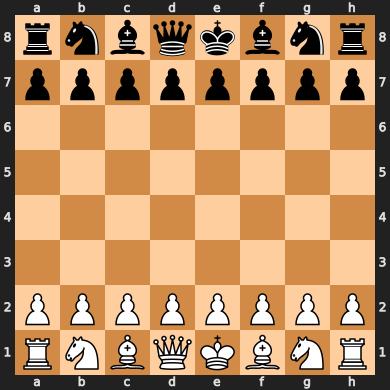

In [ ]:
board = chess.Board()
board

Script:
* Here is the starting position in chess.
* In chess, white always goes first.

In [ ]:
def heuristic(board):
    return random.random() * 2 - 1

heuristic(board)

-0.6788418060592349

Script:
* Next I wrote a heuristic that just returns random numbers.
* My intention is to have +1 represent a win, -1 represent a loss, and 0 represent a draw.
* Usually hand-written chess heuristics start with counting pieces and estimating an advantage counting pawns.
* However, in 1993, Beal and Smith found that just picking random numbers was a decent heuristic for many games including chess.
* This turned to be a rough mobility heuristic.


In [ ]:
# current player maximizes, opposing player minimizes

def negamax(board, depth):
    if board.is_game_over():
        if board.is_checkmate():
            # lost
            return -1
        else:
            # stalemate
            return 0

    if depth <= 0:
        return heuristic(board)

    v = -float("inf")
    for move in board.legal_moves:
        board.push(move)
        v = max(v, -negamax(board, depth - 1))
        board.pop()

    return v

negamax(board, 1)

0.9697726544094889

Script:
* Next, I wrote my minimax code.
* You will note that I did not actually write minimax here.
* A true minimax implementation would have a function minimax and a function maximin since one player maximizes the core and the other minimizes the score.
* I always use this variant called negamax which just uses one function and flips the signs to handle switching the objectives.

In [ ]:
# sample values 2 ply deep

[negamax(board, 2) for _ in range(10)]

[-0.6538597464804075,
 -0.4747824490042971,
 -0.7284639049210981,
 -0.5081009140676889,
 -0.5773527853964637,
 -0.6256222244951093,
 -0.6772298649215898,
 -0.5920657898922375,
 -0.535679307544338,
 -0.7594244181834509]

Script:
* Here are some sample results running negamax to depth 2.
* All the values are negative because the last choice was by the minimizing player.

In [ ]:
# sample values 3 ply deep

[negamax(board, 3) for _ in range(10)]

[0.8730481336147906,
 0.84852272886378,
 0.8348549408248342,
 0.8901793146556798,
 0.8120454214669506,
 0.8447727528270137,
 0.8249394394563481,
 0.8649000891052538,
 0.8641566392301709,
 0.867215478066647]

Script:
* And here are some sample results running negamax to depth 3.
* All the values are positive because the last choice was by the maximizing player.
* Most heuristics won't have this alternating behavior.
* Instead, they will usually have a lot of values close to zero instead.

In [ ]:
def pick_random(board):
    return random.choice(list(board.legal_moves))

pick_random(chess.Board())

Move.from_uci('h2h3')

Script:
* Here is a quick function to pick a random move.
* I'll run it a few times so you can see the different move choices.

In [ ]:
def pick_negamax(board, depth=3):
    best_move = None
    best_value = -float("inf")

    for move in board.legal_moves:
        board.push(move)
        value = -negamax(board, depth - 1)
        board.pop()

        if value > best_value:
            best_value = value
            best_move = move

    print("VALUE", best_value)
    print()

    return best_move

pick_negamax(chess.Board())

VALUE 0.8930769626150104



Move.from_uci('e2e4')

Script:
* And here is a function picking based on negamax values.
* I'll run it a few times so you can see the different move choices.

PLY 0
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R

VALUE 0.8269050895088879

PLY 1
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R

PLY 2
r n b q k b n r
p . p p p p p p
. p . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R

VALUE 0.8936254123047456

PLY 3
r n b q k b n r
p . p p p p p p
. p . . . . . .
. . . . . . . .
. . . . P . . .
. . . P . . . .
P P P . . P P P
R N B Q K B N R

PLY 4
r n b q k b n r
p . p p p p p p
. . . . . . . .
. p . . . . . .
. . . . P . . .
. . . P . . . .
P P P . . P P P
R N B Q K B N R

VALUE 0.9037695661547747

PLY 5
r n b q k b n r
p . p p p p p p
. . . . . . . .
. p . . . . . .
. . . . P . P .
. . . P . . . .
P P P . . P . P
R N B Q K B N R

PLY 6
r n b q k b n r
p . p p p p p .
. . . . . . . .
. p . . . . . p
. . . . P . P .
. . . P . . . .
P P P . . 

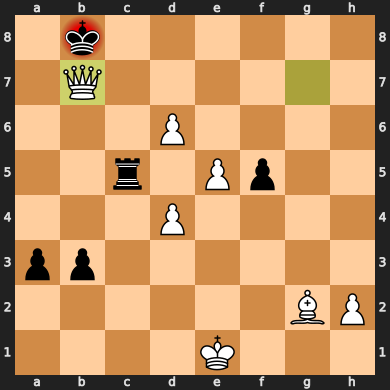

In [ ]:
# play a game

random.seed(704)

board = chess.Board()

for i in range(1000):
    print("PLY", i)
    print(board)

    if board.is_checkmate():
        print("CHECKMATE")
        break
    elif board.is_stalemate():
        print("STALEMATE")
        break
    elif board.is_check():
        print("CHECK")

    print("")

    if board.is_game_over():
        break

    if i % 2 == 0:
        move = pick_negamax(board)
    else:
        move = pick_random(board)

    board.push(move)

board

Script:
* Finally, this code will play one game between the negamax agent and the random agent.


Script:
* Neither agent plays very well, but eventually the negamax player wins.

Script: (faculty on screen)
* That was a bare bones implementation of a chess agent.
* Nowadays, the state of the art uses neural networks for the heuristics.
* Depending on the size of the neural network, they either use much deeper search with pruning techniques to go deeper, or Monte Carlo tree search for a very focused investigation.
* We will talk about both of those shortly.